## MMSB: 250 Movies, one user

In [1]:
from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils
import mmsb

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/movie_lens/ml100k_train.csv', header=None)
names = pd.read_table('../data/movie_lens/ml-100k/u.item', header=None, sep='|')[1]
data[0] = data[0] - 1 # 0-index
data[1] = data[1] - 1

In [3]:
test = pd.read_csv('../data/movie_lens/ml100k_heldout.csv', header=None)
test[0] = test[0] - 1 # 0-index
test[1] = test[1] - 1

In [4]:
data = data[data[3] == 1] # Consider user 1 only
test = test[test[3] == 1] # Consider user 1 only

In [5]:
data = data[data[1] < 250] # Consider first 250 movies only
test = test[test[1] < 250] # Consider first 250 movies only

In [6]:
X = data[[0,1,2]].values
X.shape

(1209, 3)

In [7]:
max(X[:,1]) + 1

250

In [8]:
test_X = test[[0,1,2]].values
test_X.shape

(305, 3)

# K=5

0:00:03.601982


(-604.83720724066814, -604.83720724066973)

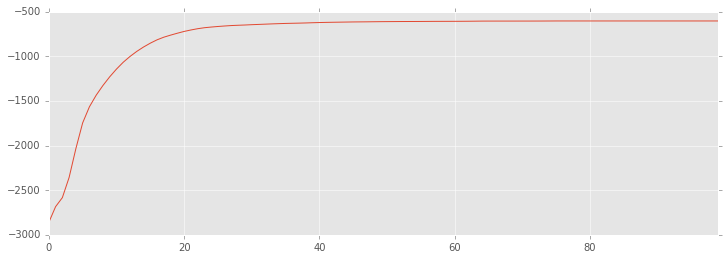

In [19]:
K = 5
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=100)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

In [20]:
pd.DataFrame(B).round(5)

,0,1,2,3,4
0,0.5,0.0,0.0,0.0,0.0
1,1.0,0.5,0.0,0.0,0.0
2,1.0,1.0,0.5,1.0,0.0
3,1.0,1.0,0.0,0.5,0.0
4,1.0,1.0,1.0,1.0,0.5


In [21]:
probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in test_X]
sum(test_X[:,2] == np.round(probs)) / float(len(test_X))

0.99016393442622952

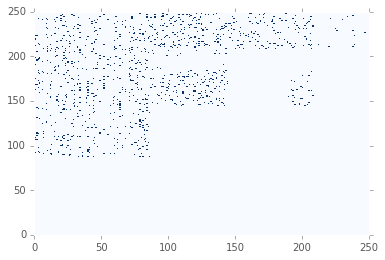

In [22]:
I = pd.DataFrame(utils.get_interactions(X))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')